#**Exploratory Data Analysis (Jupyter Notebook Version)**
by Lena Horsley

This is the Juypter Notebook version of my final project for the Coursera class Exploratory Data Analysis. [Exploratory Data Analysis](https://www.coursera.org/learn/exploratory-data-analysis) is the fourth course in the [Johns Hopkins Data Science specialization](https://www.coursera.org/specializations/jhu-data-science).

My final project can be found [here](https://github.com/LegoBatmanFan/r_programming/tree/master/004_exploratory-data-analysis).

In [1]:
import pandas as pd
import shutil
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!wget https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip

--2022-04-04 01:25:14--  https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2FNEI_data.zip
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 13.224.162.19, 13.224.162.155, 13.224.162.30, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|13.224.162.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30643310 (29M) [application/zip]
Saving to: ‘exdata%2Fdata%2FNEI_data.zip’

exdata%2Fdata%2FNEI 100%[===================>]  29.22M   101MB/s    in 0.3s    

2022-04-04 01:25:15 (101 MB/s) - ‘exdata%2Fdata%2FNEI_data.zip’ saved [30643310/30643310]



In [3]:
!unzip 'exdata%2Fdata%2FNEI_data.zip'

Archive:  exdata%2Fdata%2FNEI_data.zip
  inflating: Source_Classification_Code.rds  
  inflating: summarySCC_PM25.rds     


In [4]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS_Source_Classification = robjects.r['readRDS']
source_classification_df = readRDS_Source_Classification('Source_Classification_Code.rds')
source_classification_df.head()


,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,
2,10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Trave...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NaN,-2147483648,,,
3,10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NaN,-2147483648,,,
4,10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NaN,-2147483648,,,
5,10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclo...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NaN,-2147483648,,,


In [5]:
print("type: ",type(source_classification_df))
print("shape: ", source_classification_df.shape)

type:  <class 'pandas.core.frame.DataFrame'>
shape:  (11717, 15)


In [6]:
readRDS_summarySCC_PM25 = robjects.r['readRDS']
summarySCC_PM25_df = readRDS_summarySCC_PM25('summarySCC_PM25.rds')
summarySCC_PM25_df.head()

,fips,SCC,Pollutant,Emissions,type,year
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999


In [7]:
print("type: ",type(summarySCC_PM25_df))
print("shape: ", summarySCC_PM25_df.shape)

type:  <class 'pandas.core.frame.DataFrame'>
shape:  (6497651, 6)


In [8]:
print("unique fips", summarySCC_PM25_df['fips'].unique().tolist())
print("unique SCC", summarySCC_PM25_df['SCC'].unique().tolist())
print("unique Pollutant", summarySCC_PM25_df['Pollutant'].unique().tolist())
print("unique type", summarySCC_PM25_df['type'].unique().tolist())
print("unique year", summarySCC_PM25_df['year'].unique().tolist())

unique fips ['09001', '09003', '09005', '09007', '09009', '09011', '09013', '09015', '23001', '23003', '23005', '23007', '23009', '23011', '23013', '23015', '23017', '23019', '23021', '23023', '23025', '23027', '23029', '23031', '25001', '25003', '25005', '25007', '25009', '25011', '25013', '25015', '25017', '25019', '25021', '25023', '25025', '25027', '10001', '10003', '10005', '11001', '24001', '24003', '24005', '24009', '24011', '24013', '24015', '24017', '24019', '24021', '24023', '24025', '24027', '24029', '24031', '24033', '24035', '24037', '24039', '24041', '24043', '24045', '24047', '24510', '01001', '01003', '01005', '01007', '01009', '01011', '01013', '01015', '01017', '01019', '01021', '01023', '01025', '01027', '01029', '01031', '01033', '01035', '01037', '01039', '01041', '01043', '01045', '01047', '01049', '01051', '01053', '01055', '01057', '01059', '01061', '01063', '01065', '01067', '01069', '01071', '01073', '01075', '01077', '01079', '01081', '01083', '01085', '01087

In [9]:
plot1_dataframe = summarySCC_PM25_df.filter(regex="year|Emissions")
plot1_dataframe.head

<bound method NDFrame.head of            Emissions  year
4          15.714000  1999
8         234.178000  1999
12          0.128000  1999
16          2.036000  1999
20          0.388000  1999
...              ...   ...
75051181    0.003152  2008
75051191    0.046870  2008
75051201    1.012890  2008
75051211    0.000486  2008
75051221    0.001623  2008

[6497651 rows x 2 columns]>

In [10]:
final_summarySCC_PM25_agg_dataframe = plot1_dataframe.groupby(['year'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else x.head(1))
final_summarySCC_PM25_agg_dataframe

,year,Emissions
0,1999,7.332967e+06
1,2002,5.635780e+06
2,2005,5.454703e+06
3,2008,3.464206e+06


###**Plot 1**
This program addresses the following question from the assignment: Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Using the base plotting system, make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

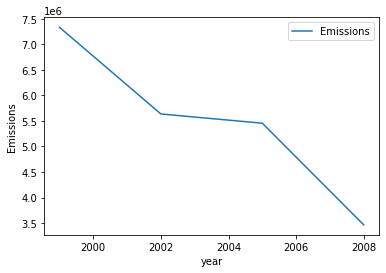

In [11]:
final_summarySCC_PM25_agg_dataframe.plot(x="year", y="Emissions", kind="line")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

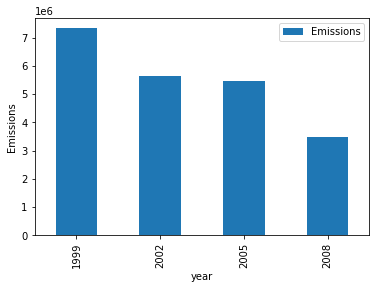

In [12]:
final_summarySCC_PM25_agg_dataframe.plot(x="year", y="Emissions", kind="bar")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

###**Plot 2**
This program addresses the following question from the assignment: Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == "24510") from 1999 to 2008? Use the base plotting system to make a plot answering this question.

In [13]:
Baltimore_summarySCC_PM25_df = summarySCC_PM25_df[(summarySCC_PM25_df['fips'] == '24510')]
Baltimore_summarySCC_PM25_df.head

<bound method NDFrame.head of            fips         SCC Pollutant  Emissions      type  year
114288    24510    10100601  PM25-PRI   6.532000     POINT  1999
114296    24510    10200601  PM25-PRI  78.880000     POINT  1999
114300    24510    10200602  PM25-PRI   0.920000     POINT  1999
114308    24510    30100699  PM25-PRI  10.376000     POINT  1999
114325    24510    30183001  PM25-PRI  10.859000     POINT  1999
...         ...         ...       ...        ...       ...   ...
49112001  24510  2267004066  PM25-PRI   0.005242  NON-ROAD  2008
49132371  24510  2268003060  PM25-PRI   0.000444  NON-ROAD  2008
49148931  24510  2265004010  PM25-PRI   1.088110  NON-ROAD  2008
49170481  24510  2260004071  PM25-PRI   0.000580  NON-ROAD  2008
49182651  24510  2267006010  PM25-PRI   0.016776  NON-ROAD  2008

[2096 rows x 6 columns]>

In [14]:
plot2_dataframe = Baltimore_summarySCC_PM25_df.filter(regex="year|Emissions")
plot2_dataframe.head

<bound method NDFrame.head of           Emissions  year
114288     6.532000  1999
114296    78.880000  1999
114300     0.920000  1999
114308    10.376000  1999
114325    10.859000  1999
...             ...   ...
49112001   0.005242  2008
49132371   0.000444  2008
49148931   1.088110  2008
49170481   0.000580  2008
49182651   0.016776  2008

[2096 rows x 2 columns]>

In [15]:
final_baltimore_summarySCC_PM25_agg_dataframe = plot2_dataframe.groupby(['year'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else x.head(1))
final_baltimore_summarySCC_PM25_agg_dataframe

,year,Emissions
0,1999,3274.180000
1,2002,2453.915743
2,2005,3091.354070
3,2008,1862.281511


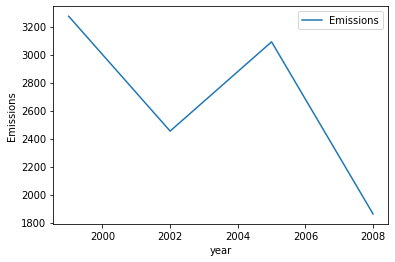

In [16]:
final_baltimore_summarySCC_PM25_agg_dataframe.plot(x="year", y="Emissions", kind="line")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

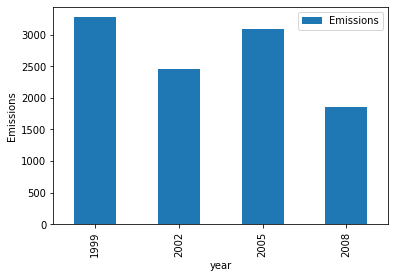

In [17]:
final_baltimore_summarySCC_PM25_agg_dataframe.plot(x="year", y="Emissions", kind="bar")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

###**Plot 3**
This program addresses the following question from the assignment: Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999-2008 for Baltimore City? Which have seen increases in emissions from 1999-2008? Use the ggplot2 plotting system to make a plot answer this question.

In [18]:
Baltimore_summarySCC_PM25_df.head

<bound method NDFrame.head of            fips         SCC Pollutant  Emissions      type  year
114288    24510    10100601  PM25-PRI   6.532000     POINT  1999
114296    24510    10200601  PM25-PRI  78.880000     POINT  1999
114300    24510    10200602  PM25-PRI   0.920000     POINT  1999
114308    24510    30100699  PM25-PRI  10.376000     POINT  1999
114325    24510    30183001  PM25-PRI  10.859000     POINT  1999
...         ...         ...       ...        ...       ...   ...
49112001  24510  2267004066  PM25-PRI   0.005242  NON-ROAD  2008
49132371  24510  2268003060  PM25-PRI   0.000444  NON-ROAD  2008
49148931  24510  2265004010  PM25-PRI   1.088110  NON-ROAD  2008
49170481  24510  2260004071  PM25-PRI   0.000580  NON-ROAD  2008
49182651  24510  2267006010  PM25-PRI   0.016776  NON-ROAD  2008

[2096 rows x 6 columns]>

In [19]:
plot3_dataframe = Baltimore_summarySCC_PM25_df.filter(regex="year|type|Emissions")
plot3_dataframe.head

<bound method NDFrame.head of           Emissions      type  year
114288     6.532000     POINT  1999
114296    78.880000     POINT  1999
114300     0.920000     POINT  1999
114308    10.376000     POINT  1999
114325    10.859000     POINT  1999
...             ...       ...   ...
49112001   0.005242  NON-ROAD  2008
49132371   0.000444  NON-ROAD  2008
49148931   1.088110  NON-ROAD  2008
49170481   0.000580  NON-ROAD  2008
49182651   0.016776  NON-ROAD  2008

[2096 rows x 3 columns]>

In [20]:
final_baltimore_summarySCC_PM25_type_agg_df = plot3_dataframe.groupby(['type','year'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else x.head(1))
final_baltimore_summarySCC_PM25_type_agg_df

,type,year,Emissions
0,NON-ROAD,1999,522.940000
1,NON-ROAD,2002,240.846922
2,NON-ROAD,2005,248.933690
3,NON-ROAD,2008,55.823561
4,NONPOINT,1999,2107.625000
5,NONPOINT,2002,1509.500000
6,NONPOINT,2005,1509.500000
7,NONPOINT,2008,1373.207308
8,ON-ROAD,1999,346.820000
9,ON-ROAD,2002,134.308821


In [21]:
final_baltimore_summarySCC_PM25_type_agg_df["Emissions1"] = final_baltimore_summarySCC_PM25_type_agg_df["Emissions"].astype('int')
final_baltimore_summarySCC_PM25_type_agg_df

,type,year,Emissions,Emissions1
0,NON-ROAD,1999,522.940000,522
1,NON-ROAD,2002,240.846922,240
2,NON-ROAD,2005,248.933690,248
3,NON-ROAD,2008,55.823561,55
4,NONPOINT,1999,2107.625000,2107
5,NONPOINT,2002,1509.500000,1509
6,NONPOINT,2005,1509.500000,1509
7,NONPOINT,2008,1373.207308,1373
8,ON-ROAD,1999,346.820000,346
9,ON-ROAD,2002,134.308821,134


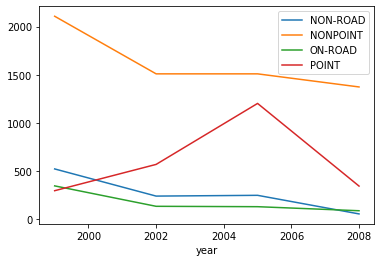

In [22]:
fig, ax = plt.subplots()
for key, grp in final_baltimore_summarySCC_PM25_type_agg_df.groupby(['type']):
    ax = grp.plot(ax=ax, kind='line', x='year', y='Emissions1', label=key)

plt.legend(loc='best')
plt.show()

In [23]:
fig1 = px.bar(final_baltimore_summarySCC_PM25_type_agg_df, x="year", y="Emissions1", color='type', barmode='group',text="Emissions1",height=400)
fig1.show()


In [24]:
fig2 = px.bar(final_baltimore_summarySCC_PM25_type_agg_df, x="Emissions1", y="year", color='type', barmode='group',text="Emissions1",height=400, orientation='h')
fig2.show()

In [25]:
fig3 = px.bar(final_baltimore_summarySCC_PM25_type_agg_df, x="year", y="Emissions1", color='type', barmode='stack',text="Emissions1",height=400)
fig3.show()

###**Plot 4**
This program addresses the following question from the assignment: Across the United States, how have emissions from coal combustion-related sources changed from 1999-2008?

In [26]:
coal_source_classification_df = source_classification_df[source_classification_df["EI.Sector"].str.contains("coal|Coal")]
coal_source_classification_df.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,
2,10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Trave...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NaN,-2147483648,,,
3,10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NaN,-2147483648,,,
4,10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NaN,-2147483648,,,
5,10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclo...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NaN,-2147483648,,,


In [27]:
coal_source_classification_df.shape

(99, 15)

In [28]:
merged_dataframe = coal_source_classification_df.merge(summarySCC_PM25_df, on=['SCC'], how='left')
merged_dataframe.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes,fips,Pollutant,Emissions,type,year
0,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,,01003,PM25-PRI,0.135,POINT,1999.0
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,,01093,PM25-PRI,0.269,POINT,1999.0
2,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,,01097,PM25-PRI,0.648,POINT,1999.0
3,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,,01103,PM25-PRI,0.110,POINT,1999.0
4,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NaN,-2147483648,,,,01117,PM25-PRI,0.108,POINT,1999.0


In [29]:
merged_dataframe.shape

(28499, 20)

In [30]:
merged_dataframe = merged_dataframe.dropna(axis=0, subset=['year'])
merged_dataframe = merged_dataframe.dropna(axis=0, subset=['Emissions'])
merged_dataframe["year1"] = merged_dataframe["year"].astype('int')
merged_dataframe.head()


,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,...,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes,fips,Pollutant,Emissions,type,year,year1
0,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,...,-2147483648,,,,01003,PM25-PRI,0.135,POINT,1999.0,1999
1,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,...,-2147483648,,,,01093,PM25-PRI,0.269,POINT,1999.0,1999
2,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,...,-2147483648,,,,01097,PM25-PRI,0.648,POINT,1999.0,1999
3,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,...,-2147483648,,,,01103,PM25-PRI,0.110,POINT,1999.0,1999
4,10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulve...,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,...,-2147483648,,,,01117,PM25-PRI,0.108,POINT,1999.0,1999


In [31]:
final_merged_dataframe_agg = merged_dataframe.filter(regex="year|Emissions")
final_merged_dataframe_agg1 = final_merged_dataframe_agg.groupby(['year'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else x.head(1))
final_merged_dataframe_agg1.head()

,year,Emissions,year1
0,1999.0,572126.500000,1999
1,2002.0,546789.182975,2002
2,2005.0,552881.472118,2005
3,2008.0,343432.223324,2008


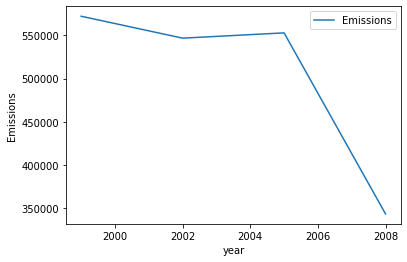

In [32]:
final_merged_dataframe_agg1.plot(x="year1", y="Emissions", kind="line")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

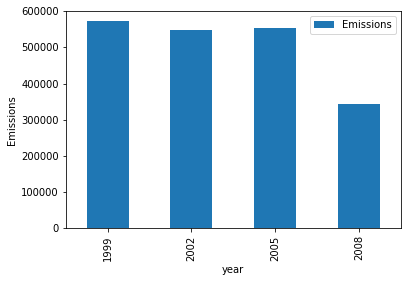

In [33]:
final_merged_dataframe_agg1.plot(x="year1", y="Emissions", kind="bar")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

###**Plot 5**
This program addresses the following question from the assignment: Across the United States, how have emissions from coal combustion-related sources changed from 1999-2008?

In [34]:
motor_source_classification_df = source_classification_df[source_classification_df["Short.Name"].str.contains("motor|Motor")]
motor_source_classification_df.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
408,20400201,Point,Int Comb /Engine Testing /Rocket Engine Testin...,"Fuel Comb - Industrial Boilers, ICEs - Other",,,Internal Combustion Engines,Engine Testing,Rocket Engine Testing,Rocket Motor: Solid Propellant,NaN,-2147483648,,,
1051,2201080000,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - To...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Total: All Road Types,NaN,2005,,7/25/2008 0:00:00,
1052,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,NaN,-2147483648,,,
1053,2201080111,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - In...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Interstate: Rural Time 1,NaN,2002,,,
1054,2201080112,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - In...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Interstate: Rural Time 2,NaN,2002,,,


In [35]:
baltimore_summarySCC_PM25_df2 = summarySCC_PM25_df[(summarySCC_PM25_df['fips'] == '24510')]
baltimore_merge_df = motor_source_classification_df.merge(baltimore_summarySCC_PM25_df2, on=['SCC'], how='left')
baltimore_merge_df.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes,fips,Pollutant,Emissions,type,year
0,20400201,Point,Int Comb /Engine Testing /Rocket Engine Testin...,"Fuel Comb - Industrial Boilers, ICEs - Other",,,Internal Combustion Engines,Engine Testing,Rocket Engine Testing,Rocket Motor: Solid Propellant,NaN,-2147483648,,,,NaN,NaN,NaN,NaN,NaN
1,2201080000,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - To...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Total: All Road Types,NaN,2005,,7/25/2008 0:00:00,,NaN,NaN,NaN,NaN,NaN
2,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,NaN,-2147483648,,,,NaN,NaN,NaN,NaN,NaN
3,2201080111,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - In...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Interstate: Rural Time 1,NaN,2002,,,,NaN,NaN,NaN,NaN,NaN
4,2201080112,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - In...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Interstate: Rural Time 2,NaN,2002,,,,NaN,NaN,NaN,NaN,NaN


In [36]:
baltimore_merge_df.shape

(192, 20)

In [37]:
baltimore_merge_df = baltimore_merge_df.dropna(axis=0, subset=['year'])
baltimore_merge_df = baltimore_merge_df.dropna(axis=0, subset=['Emissions'])
baltimore_merge_df["year1"] = baltimore_merge_df["year"].astype('int')
baltimore_merge_df.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,...,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes,fips,Pollutant,Emissions,type,year,year1
34,220108017B,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Major Collector: Brake Wear,...,2005,2/13/2002 0:00:00,7/25/2008 0:00:00,,24510,PM25-PRI,2.385814e-04,ON-ROAD,2002.0,2002
35,220108017B,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Major Collector: Brake Wear,...,2005,2/13/2002 0:00:00,7/25/2008 0:00:00,,24510,PM25-PRI,2.354509e-06,ON-ROAD,2005.0,2005
36,220108017T,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Major Collector: Tire Wear,...,2005,2/13/2002 0:00:00,7/25/2008 0:00:00,,24510,PM25-PRI,4.484070e-05,ON-ROAD,2002.0,2002
37,220108017T,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Major Collector: Tire Wear,...,2005,2/13/2002 0:00:00,7/25/2008 0:00:00,,24510,PM25-PRI,4.421016e-07,ON-ROAD,2005.0,2005
39,220108017X,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Major Collector: Exhaust,...,2005,2/13/2002 0:00:00,7/25/2008 0:00:00,,24510,PM25-PRI,6.558844e-04,ON-ROAD,2002.0,2002


In [38]:
final_baltimore_merge_df_agg = baltimore_merge_df.filter(regex="year|Emissions")
final_baltimore_merge_df_agg1 = final_baltimore_merge_df_agg.groupby(['year'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else x.head(1))
final_baltimore_merge_df_agg1.head()

,year,Emissions,year1
0,1999.0,0.560000,1999
1,2002.0,10.518394,2002
2,2005.0,10.224068,2005
3,2008.0,0.477206,2008


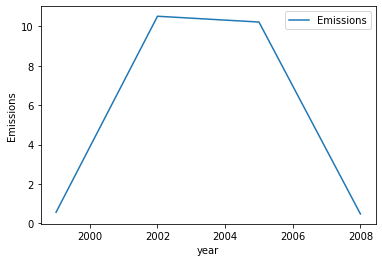

In [39]:
final_baltimore_merge_df_agg1.plot(x="year1", y="Emissions", kind="line")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

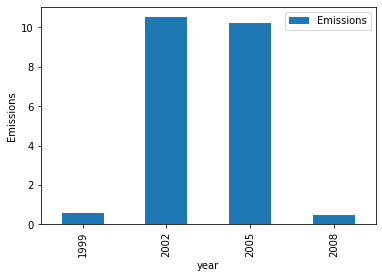

In [40]:
final_baltimore_merge_df_agg1.plot(x="year1", y="Emissions", kind="bar")
plt.xlabel("year")
plt.ylabel("Emissions")
plt.show()

###**Plot 6**
This program addresses the following question from the assignment: Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == "06037"). Which city has seen greater changes over time in motor vehicle emissions?

In [41]:
motor_source_classification_df2 = source_classification_df[source_classification_df["Short.Name"].str.contains("motor|Motor")]
motor_source_classification_df2.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
408,20400201,Point,Int Comb /Engine Testing /Rocket Engine Testin...,"Fuel Comb - Industrial Boilers, ICEs - Other",,,Internal Combustion Engines,Engine Testing,Rocket Engine Testing,Rocket Motor: Solid Propellant,NaN,-2147483648,,,
1051,2201080000,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - To...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Total: All Road Types,NaN,2005,,7/25/2008 0:00:00,
1052,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,NaN,-2147483648,,,
1053,2201080111,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - In...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Interstate: Rural Time 1,NaN,2002,,,
1054,2201080112,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - In...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Interstate: Rural Time 2,NaN,2002,,,


In [42]:
two_cities_summarySCC_PM25_df2 = summarySCC_PM25_df[(summarySCC_PM25_df['fips'] == '24510') | (summarySCC_PM25_df['fips'] == '06037')]
two_cities_summarySCC_PM25_df2_merge_df = motor_source_classification_df.merge(two_cities_summarySCC_PM25_df2, on=['SCC'], how='left')
two_cities_summarySCC_PM25_df2_merge_df.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes,fips,Pollutant,Emissions,type,year
0,20400201,Point,Int Comb /Engine Testing /Rocket Engine Testin...,"Fuel Comb - Industrial Boilers, ICEs - Other",,,Internal Combustion Engines,Engine Testing,Rocket Engine Testing,Rocket Motor: Solid Propellant,NaN,-2147483648,,,,NaN,NaN,NaN,NaN,NaN
1,2201080000,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - To...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Total: All Road Types,NaN,2005,,7/25/2008 0:00:00,,NaN,NaN,NaN,NaN,NaN
2,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,NaN,-2147483648,,,,06037,PM25-PRI,0.0300,ON-ROAD,1999.0
3,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,NaN,-2147483648,,,,06037,PM25-PRI,14.3445,ON-ROAD,2008.0
4,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,NaN,-2147483648,,,,06037,PM25-PRI,0.4015,ON-ROAD,2008.0


In [43]:
two_cities_summarySCC_PM25_df2_merge_df.shape

(270, 20)

In [44]:
two_cities_summarySCC_PM25_df2_merge_df = two_cities_summarySCC_PM25_df2_merge_df.dropna(axis=0, subset=['year'])
two_cities_summarySCC_PM25_df2_merge_df = two_cities_summarySCC_PM25_df2_merge_df.dropna(axis=0, subset=['Emissions'])
two_cities_summarySCC_PM25_df2_merge_df["year1"] = two_cities_summarySCC_PM25_df2_merge_df["year"].astype('int')
two_cities_summarySCC_PM25_df2_merge_df.head()

,SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,...,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes,fips,Pollutant,Emissions,type,year,year1
2,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,...,-2147483648,,,,06037,PM25-PRI,0.030000,ON-ROAD,1999.0,1999
3,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,...,-2147483648,,,,06037,PM25-PRI,14.344500,ON-ROAD,2008.0,2008
4,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,...,-2147483648,,,,06037,PM25-PRI,0.401500,ON-ROAD,2008.0,2008
5,2201080110,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Total,...,-2147483648,,,,06037,PM25-PRI,1.095000,ON-ROAD,2008.0,2008
10,220108011B,Onroad,Highway Veh - Gasoline - Motorcycles (MC) - Ru...,Mobile - On-Road Gasoline Light Duty Vehicles,,,Mobile Sources,Highway Vehicles - Gasoline,Motorcycles (MC),Rural Interstate: Brake Wear,...,2005,2/13/2002 0:00:00,7/25/2008 0:00:00,,06037,PM25-PRI,0.002945,ON-ROAD,2002.0,2002


In [45]:
two_cities_summarySCC_PM25_df2_merge_df_agg = two_cities_summarySCC_PM25_df2_merge_df.filter(regex="year1|fips|Emissions")
two_cities_summarySCC_PM25_df2_merge_df_agg1 = two_cities_summarySCC_PM25_df2_merge_df_agg.groupby(['year1','fips'],as_index=False).agg(lambda x : x.sum())
two_cities_summarySCC_PM25_df2_merge_df_agg1

,year1,fips,Emissions
0,1999,06037,68.406000
1,1999,24510,0.560000
2,2002,06037,78.059849
3,2002,24510,10.518394
4,2005,06037,85.765799
5,2005,24510,10.224068
6,2008,06037,85.187120
7,2008,24510,0.477206


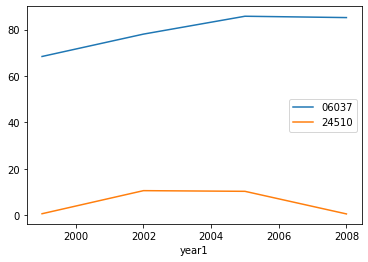

In [46]:
fig6, ax6 = plt.subplots()
for key, grp in two_cities_summarySCC_PM25_df2_merge_df_agg1.groupby(['fips']):
    ax = grp.plot(ax=ax6, kind='line', x='year1', y='Emissions', label=key)

plt.legend(loc='best')
plt.show()

In [47]:
fig7 = px.bar(two_cities_summarySCC_PM25_df2_merge_df_agg1, x="year1", y="Emissions", color='fips', barmode='group',text="Emissions",height=400)
fig7.show()

References
* [Pandas select unique values from column](https://stackoverflow.com/questions/48292656/pandas-select-unique-values-from-column)
* [Loading a .rds file in Pandas](https://stackoverflow.com/questions/40996175/loading-a-rds-file-in-pandas)
* [Plot line graph from Pandas dataframe (with multiple lines)](https://stackoverflow.com/questions/50642098/plot-line-graph-from-pandas-dataframe-with-multiple-lines)
* [Plotly horizontal bar plots giving unexpected results](https://stackoverflow.com/questions/62825975/plotly-horizontal-bar-plots-giving-unexpected-results)
* [How to create a grouped bar plot](https://stackoverflow.com/questions/47796264/how-to-create-a-grouped-bar-plot)
* [How to create Stacked bar chart in Python-Plotly?](https://www.geeksforgeeks.org/how-to-create-stacked-bar-chart-in-python-plotly/)
* [Filter pandas DataFrame by substring criteria](https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria)
* [Joining two dataframes where each row in one dataframe matches two rows in other dataframe](https://stackoverflow.com/questions/46818555/joining-two-dataframes-where-each-row-in-one-dataframe-matches-two-rows-in-other)
* [Delete rows if there are null values in a specific column in Pandas dataframe](https://stackoverflow.com/questions/49291740/delete-rows-if-there-are-null-values-in-a-specific-column-in-pandas-dataframe)